# Distribution fitting

https://reliability.readthedocs.io/en/stable/index.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from reliability.Distributions import Lognormal_Distribution
from reliability.Probability_plotting import Lognormal_probability_plot
from reliability.Fitters import Fit_Everything

## Define a function from its parameters

In [2]:
#Lognormal, mu=1 (scale parameter), sigma=0.5 (shape parameter)

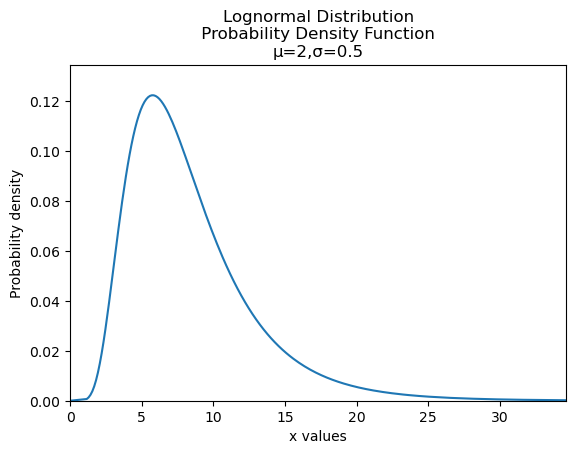

In [3]:
mu = 2
sigma = 0.5
dist = Lognormal_Distribution(mu=mu, sigma = sigma)

dist.PDF(label='PDF');

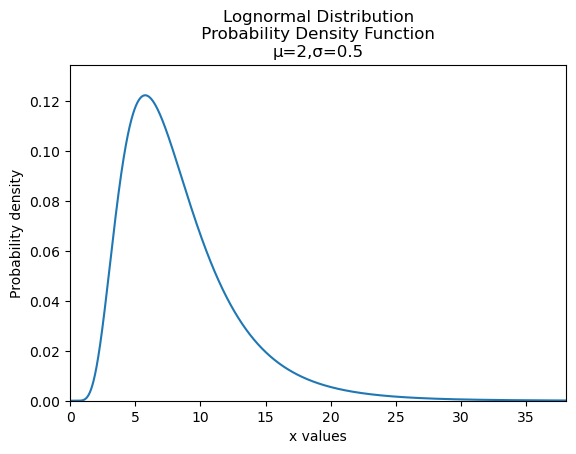

In [4]:
x = np.arange(0, 1.1*dist.quantile(0.999), 0.01)

pdf_vals = dist.PDF(xvals = x)
cdf_vals = dist.CDF(xvals = x, show_plot = False)

### Probability of having a value larger than a threshold

In [5]:
x

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 3.808e+01, 3.809e+01,
       3.810e+01])

In [6]:
threshold1 = 12#dist.quantile(.95)

prob_thr_large = np.trapz(pdf_vals[x>threshold1], x = x[x>threshold1])*100 #Integrate
print('The probability of having a value larger than {0} is {1}%'.format(threshold1, np.round(prob_thr_large, 3)))

The probability of having a value larger than 12 is 16.514%


### Probability of having a value smaller than a threshold

In [7]:
threshold2 = 6 #dist.quantile(.95)

prob_thr_small = np.trapz(pdf_vals[x<threshold2], x = x[x<threshold2])*100 #Integrate
print('The probability of having a value smaller than {0} is {1}%'.format(threshold2, np.round(prob_thr_small, 3)))

The probability of having a value smaller than 6 is 33.731%


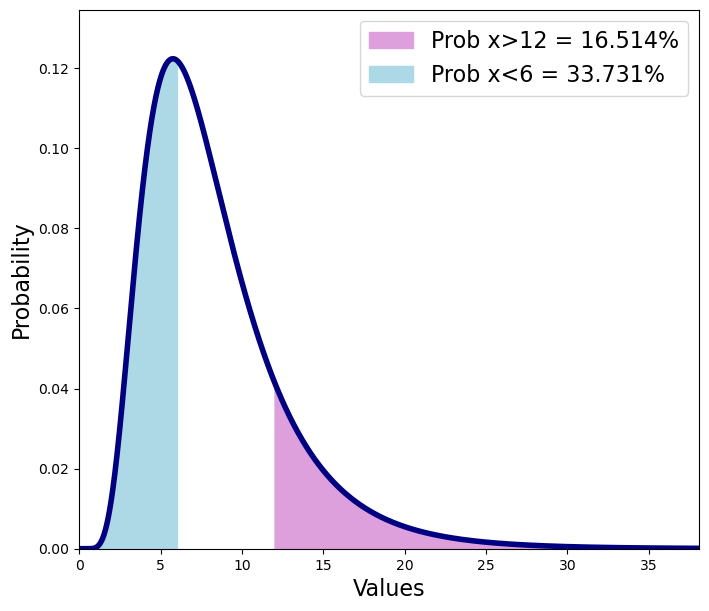

In [8]:
plt.figure(figsize = [8, 7])
plt.plot(x, pdf_vals, color = 'navy', linewidth = 4)

#Larger than threshold
plt.fill_between(np.linspace(threshold1, max(x), len(pdf_vals[x>threshold1])), 
                 np.full(len(pdf_vals[x>threshold1]), 0), pdf_vals[x>threshold1],
                color = 'plum', label = 'Prob x>{0} = {1}%'.format(threshold1, np.round(prob_thr_large,3)))
#Smaller than threshold
plt.fill_between(np.linspace(min(x), threshold2, len(pdf_vals[x<threshold2])), 
                 np.full(len(pdf_vals[x<threshold2]), 0), pdf_vals[x<threshold2],
                color = 'lightblue', label = 'Prob x<{0} = {1}%'.format(threshold2, np.round(prob_thr_small,3)))

plt.xlim([0, max(x)])
plt.ylim([0, np.max(pdf_vals)*1.1])

plt.xlabel('Values', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.legend(fontsize = 16)

### Quantile from CDF distribution

In [9]:
q = 0.95 #quantile from 0 to 1
x_q = dist.quantile(q) #x value por that quantile

print('The probability of x < {0} = {1}'.format(np.round(x_q, 3), q))

The probability of x < 16.818 = 0.95


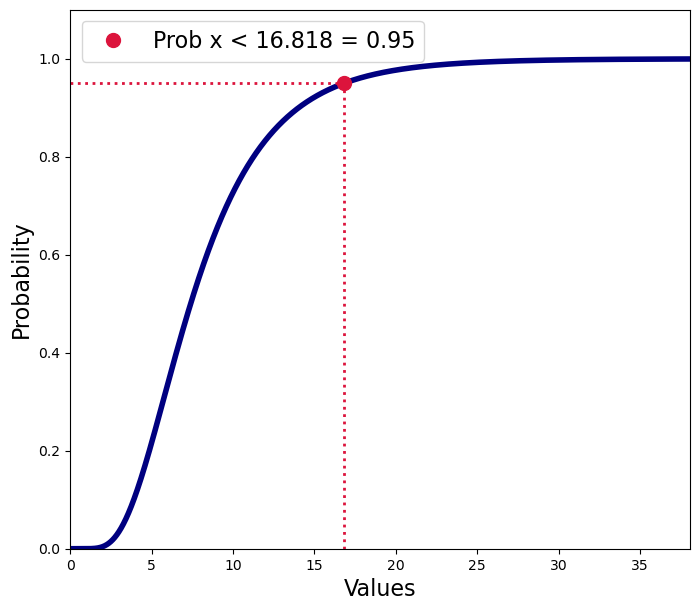

In [10]:
plt.figure(figsize = [8,7])
plt.plot(x, cdf_vals, color = 'navy', linewidth = 4)

plt.plot(x_q, q, '.', color = 'crimson', markersize = 20, label =  'Prob x < {0} = {1}'.format(np.round(x_q, 3), q))
plt.plot([0, x_q],[q, q], color = 'crimson', linestyle = ':', linewidth = 2)
plt.plot([x_q, x_q], [0, q], color = 'crimson', linestyle = ':', linewidth = 2)


plt.xlim([0, max(x)])
plt.ylim([0, 1.1])

plt.xlabel('Values', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.legend(fontsize = 16)

In [11]:
dist.stats()

Descriptive statistics for Lognormal distribution with mu = 2.0 and sigma = 0.5
Mean =  8.372897488127265
Median = 7.38905609893065
Mode = 5.754602676005731
5th quantile = 3.246486019165694
95th quantile = 16.817614402410168
Standard deviation = 4.462254918069333
Variance = 19.911718953833947
Skewness = 1.7501896550697178
Excess kurtosis = 5.898445673784778


## Fit from data samples

### Generate Random Values from distribution

In [12]:
dist.name

'Lognormal'

In [13]:
data_fit = dist.random_samples(1000)

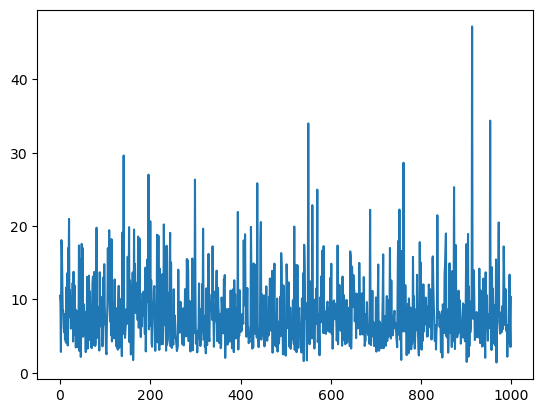

In [14]:
plt.plot(data_fit)

### Fit to all distributions

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 1000/0 (0% right censored) 

   Distribution   Alpha    Beta     Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma   Lambda  Log-likelihood    AICc     BIC       AD   optimizer
   Lognormal_2P                                                                           1.97322 0.517173                 -2732.69  5469.4  5479.2 0.233114 nelder-mead
   Lognormal_3P                 0.0839357                                                 1.95976  0.52411                 -2732.65 5471.33 5486.03 0.222553         TNC
 Loglogistic_2P  7.1832 3.38683                                                                                            -2741.28 5486.57 5496.37 0.850195         TNC
 Loglogistic_3P 6.51239 3.05434  0.626989                                                                                  -2739.67 5485.37 5500.07 0.761594         TNC
       Gamma_3P 2.67386 2.61178   1.24676        

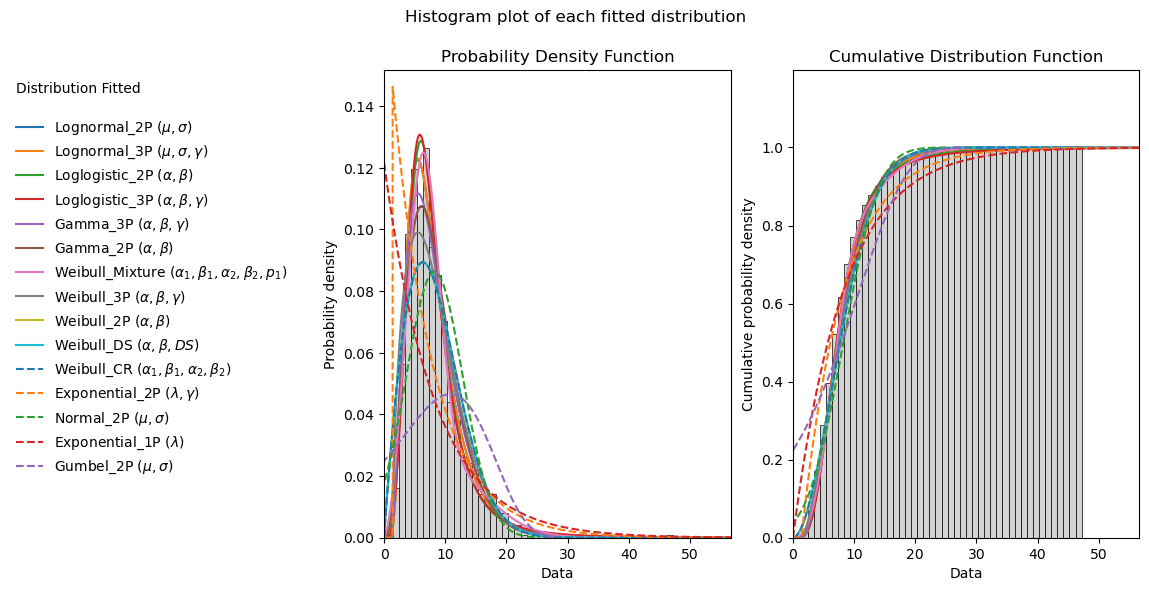

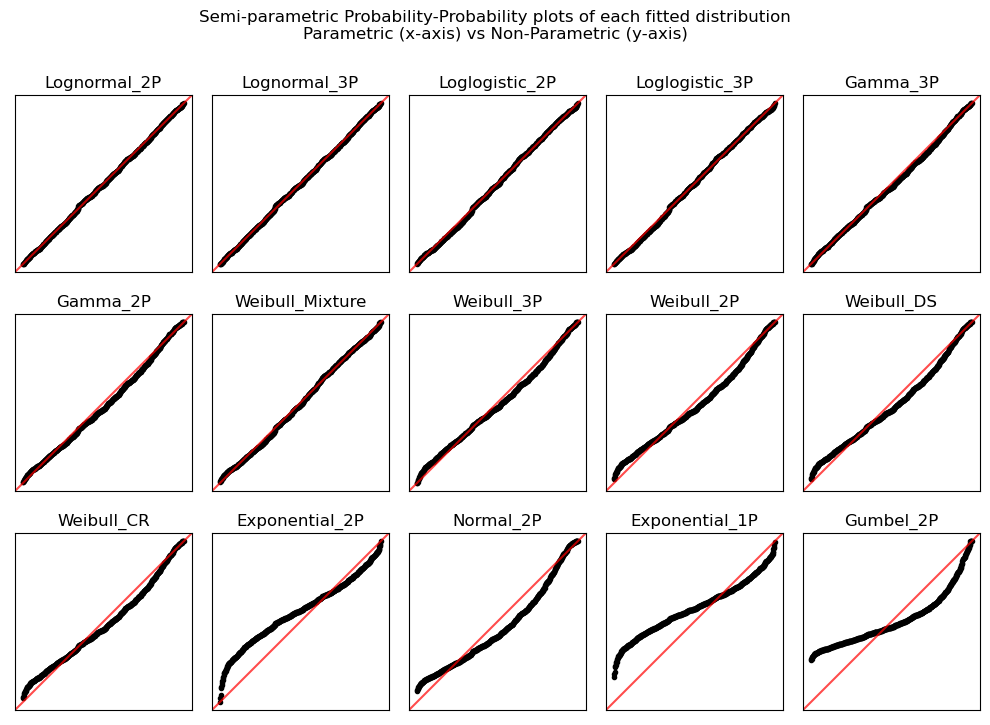

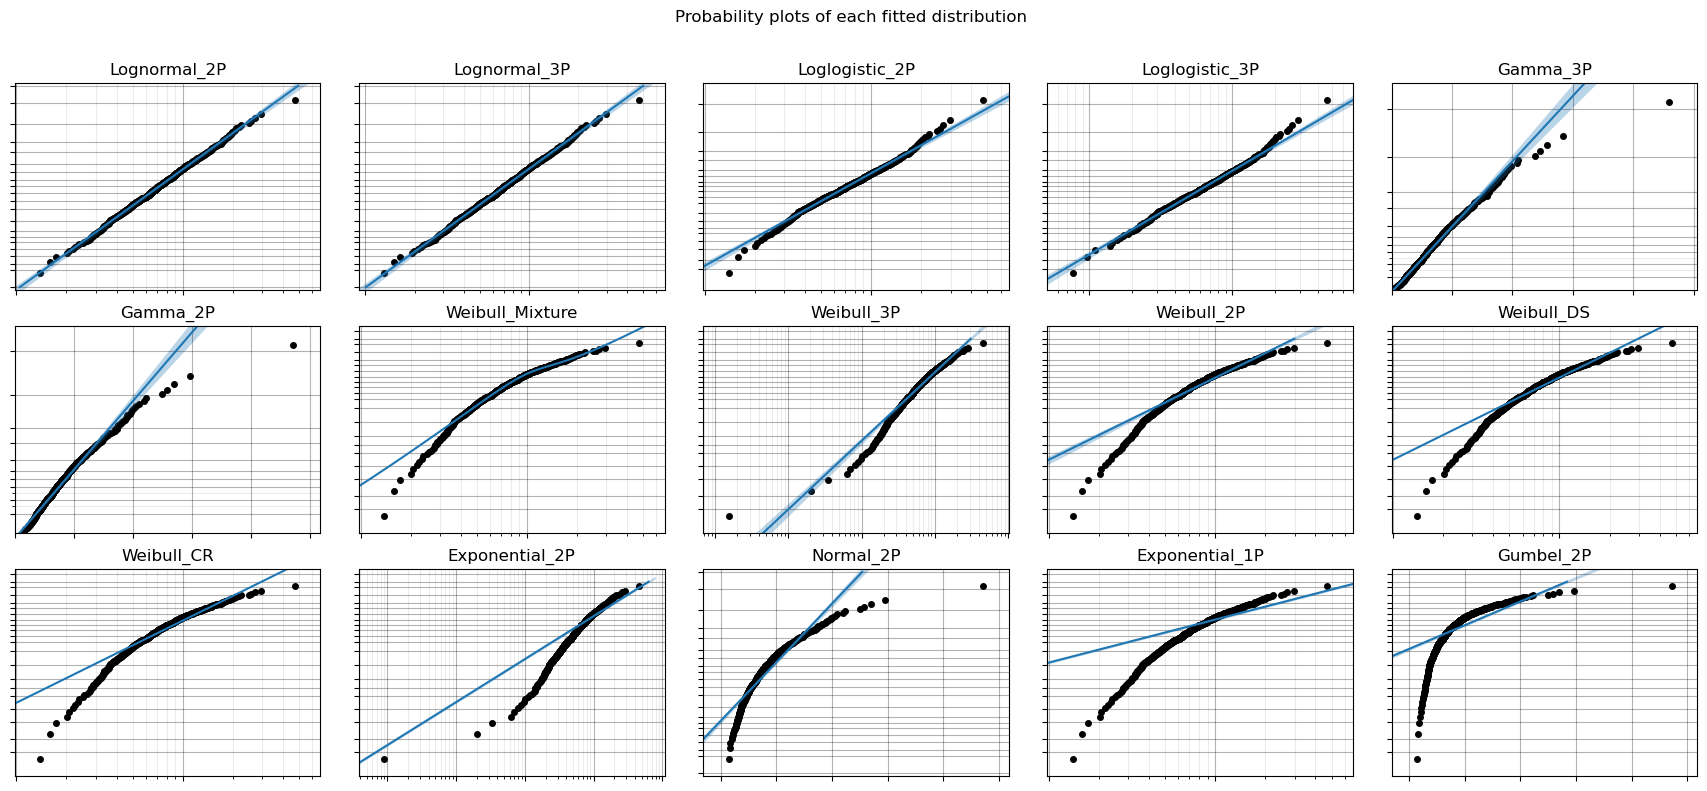

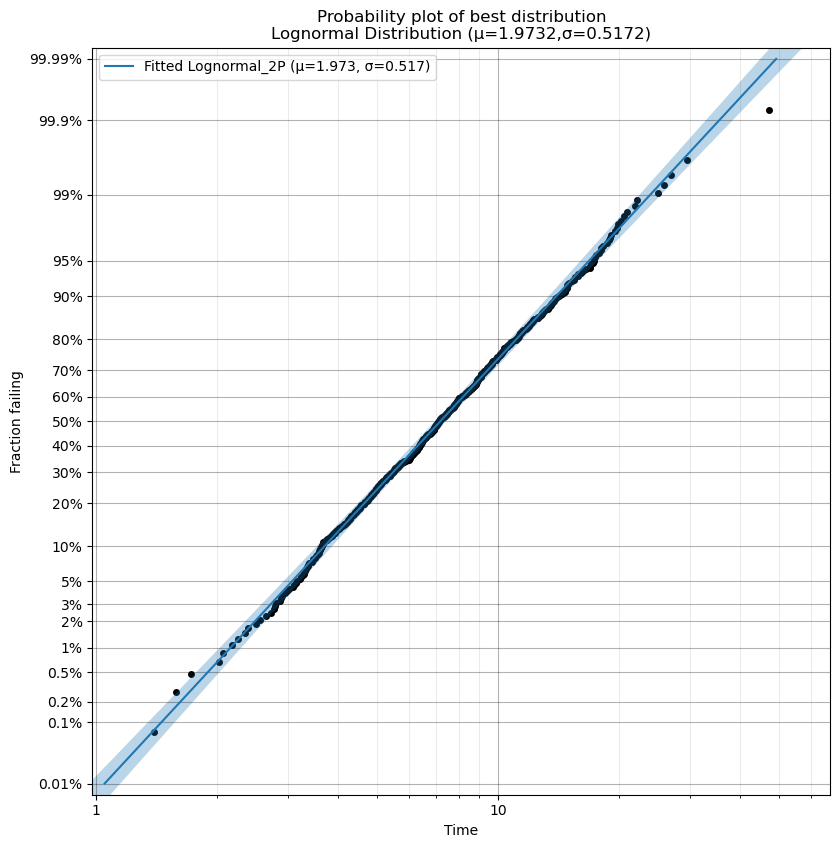

In [15]:
results = Fit_Everything(failures=data_fit)

In [16]:
from reliability.Fitters import Fit_Lognormal_2P

Results from Fit_Lognormal_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Optimizer: nelder-mead
Failures / Right censored: 1000/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
       Mu         1.97322       0.0163544   1.94116   2.00527
    Sigma        0.517173       0.0115657  0.494994  0.540346 

Goodness of fit    Value
 Log-likelihood -2732.69
           AICc   5469.4
            BIC   5479.2
             AD 0.233114 



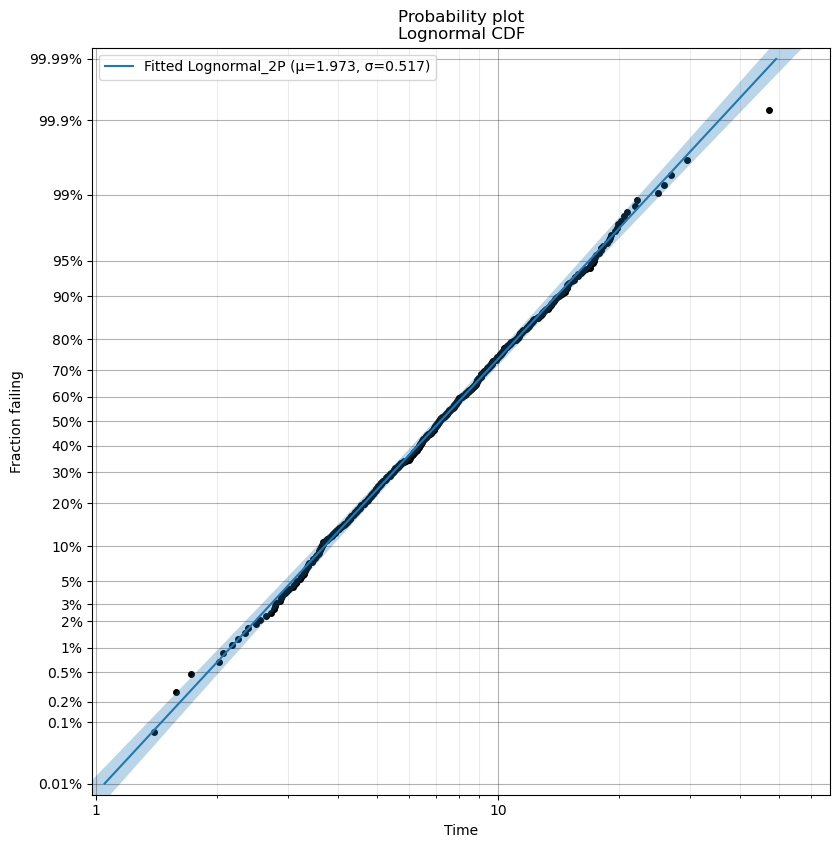

In [17]:
Fit_Lognormal_2P(failures=data_fit)

### Best Distribution

In [18]:
print('The best fitting distribution was', results.best_distribution_name, 'which had parameters', results.best_distribution.parameters)

The best fitting distribution was Lognormal_2P which had parameters [1.97321825 0.51717306 0.        ]


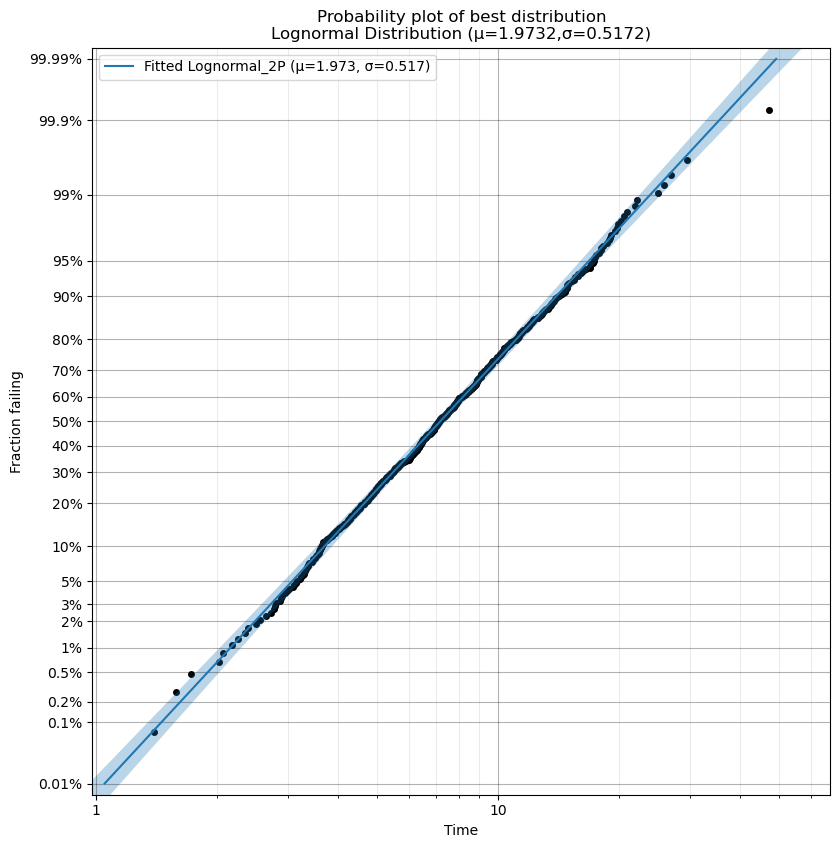

In [19]:
results.best_distribution_probability_plot

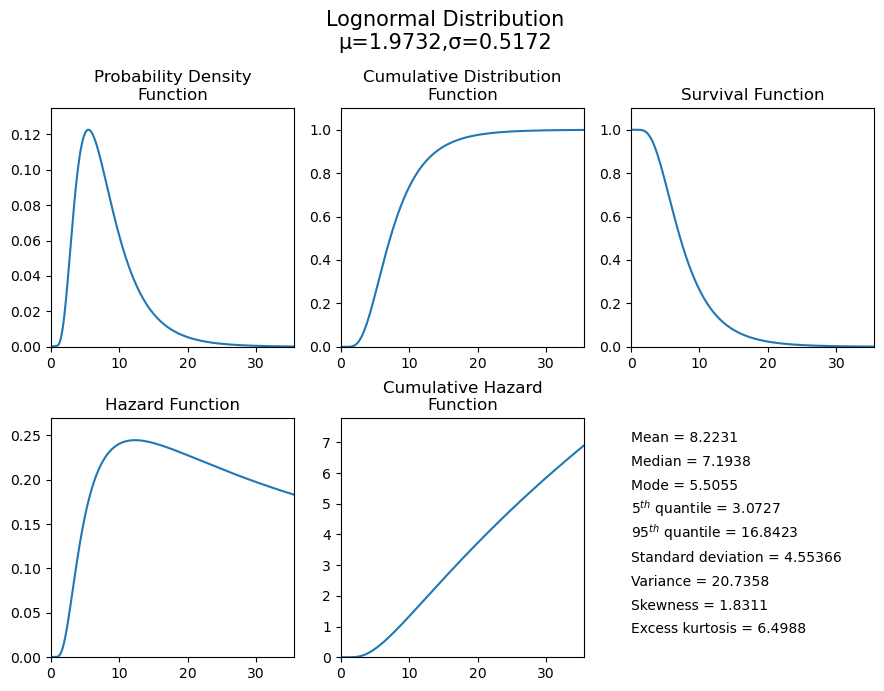

In [20]:
results.best_distribution.plot();

## TESTS

In [21]:
from reliability.Reliability_testing import KStest

Critical value for a sample larger than 100 is approx. 1.36/sqrt(n) at a 0.05 confidence level

Results from Kolmogorov-Smirnov test:
Kolmogorov-Smirnov statistic: 0.017841472369122258
Kolmogorov-Smirnov critical value: 0.042776500461245
At the 0.05 significance level, we can ACCEPT the hypothesis that the data comes from a Lognormal Distribution (μ=1.9732,σ=0.5172)


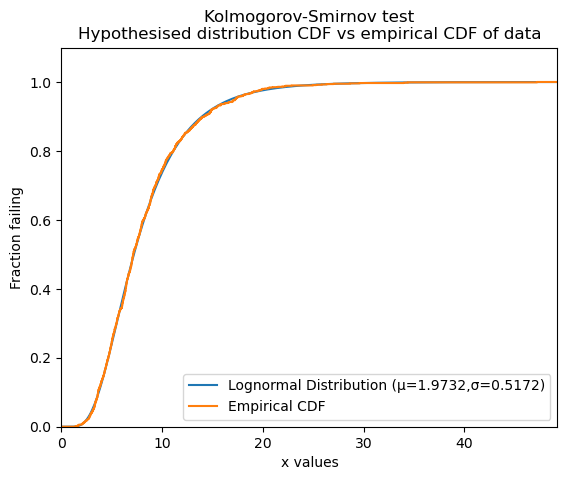

In [22]:
KStest(distribution=results.best_distribution, data=data_fit)

In [23]:
from reliability.Reliability_testing import chi2test

Results from Chi-squared test:
Chi-squared statistic: 63.85036914896749
Chi-squared critical value: 59.30351202689981
At the 0.05 significance level, we can REJECT the hypothesis that the data comes from a Lognormal Distribution (μ=1.9732,σ=0.5172)


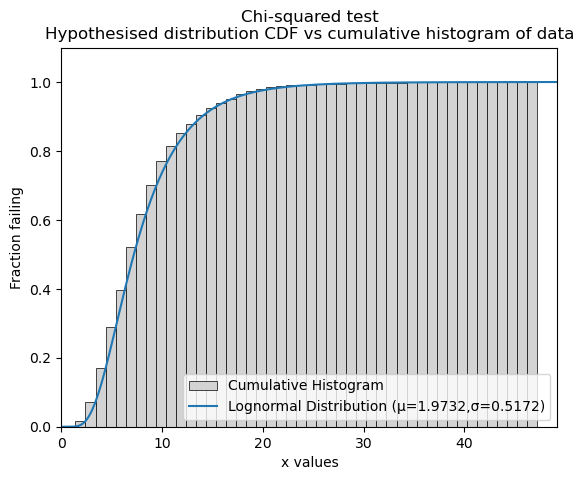

In [24]:
chi2test(distribution=results.best_distribution, data=data_fit)